In [ ]:
!pip install -q transformers


In [1]:
!pip install -q pysentimiento



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# Análisis exploratorio de datos

In [3]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/2025/Pega/Concurso Caja los Andes/dataset_Caso_2.csv")

In [5]:
df.duplicated().value_counts()

,count
False,2218
True,431


In [6]:
#Se elmininan duplicados
df = df.loc[-df.duplicated()].reset_index(drop=True)

In [7]:
#Frecuencia de la cantidad de palabras de los tweets.
df.texto_tweet.apply(lambda x: len(x.split(" "))).value_counts().reset_index().sort_values(by='texto_tweet', ascending=True).head()
freq_data = df.texto_tweet.apply(lambda x: len(x.split(" "))).value_counts().reset_index().sort_values(by='texto_tweet', ascending=True).values

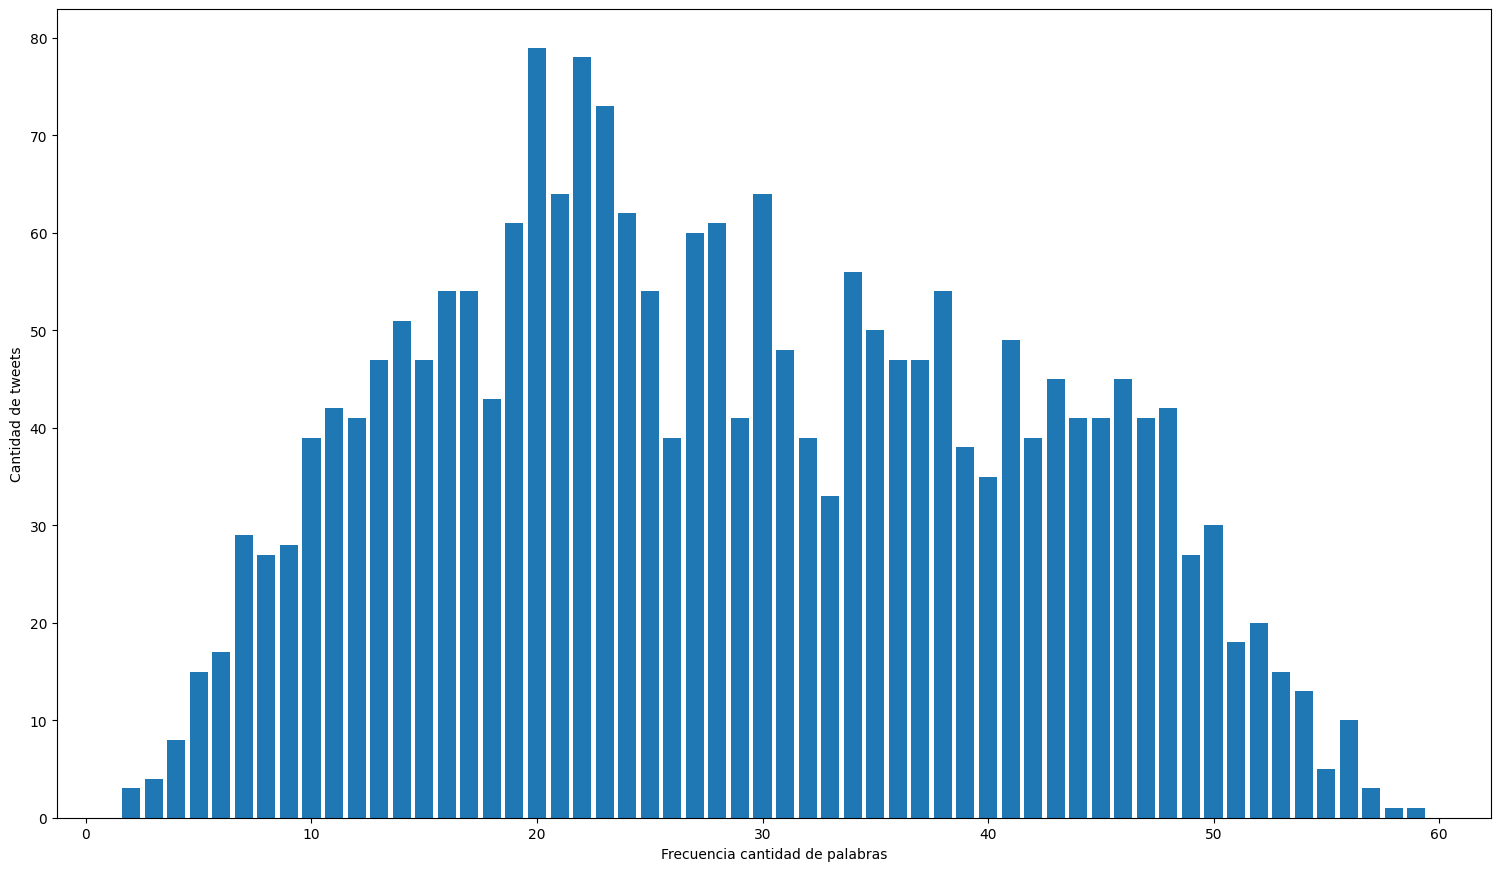

In [8]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.bar(freq_data[:,0], freq_data[:,1])
plt.xlabel("Frecuencia cantidad de palabras")
plt.ylabel("Cantidad de tweets")
plt.show()

# transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [ ]:
specific_model = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

specific_model(data)

[{'label': 'POS', 'score': 0.9916695356369019},
 {'label': 'NEG', 'score': 0.9806600213050842}]

# pysentimiento

**Algo de documentacion**

Paper de BERT
https://arxiv.org/pdf/1810.04805

Link de hugging face a Robertuito
https://huggingface.co/pysentimiento/robertuito-sentiment-analysis

Paper de RoBERTuito
https://arxiv.org/pdf/2111.09453
-------------------------------------------------------------
**Dataset usados en Robertuito**

*   TASS Dataset license (License for Sentiment Analysis in Spanish, Emotion Analysis in Spanish & English)
*   SEMEval 2017 Dataset license (Sentiment Analysis in English)
*   LinCE Datasets (License for NER & POS tagging)

------------------------------------------------------------

**Métrica de medición de resultados**
\begin{equation}
  F_{1} = 2 * \frac{precision * recall}{precision + recall}
\end{equation}

Donde

\begin{equation}
  precision = \frac{TP}{TP + FP}
\end{equation}

\begin{equation}
  recall = \frac{TP}{TP + FN}
\end{equation}

y para "macro" $F_{1}$ se calcula de manera separa una metrica de f1 para cada "especie" y luego se promedia.

\begin{equation}
  \text{Macro } F_{1} \text{Score} = \frac{ ∑_{i=1}^{n} F_{1} \text{Score}_{i} }{n}
\end{equation}

La métrica F1 es útil cuando hay desbalance de clases, ya que resume el desempeño de predecir cada clase a pesar del desbalance.
-----------------------------------------------------------
El score macro F1 de RoBERTuito_{uncased} para la tarea de Sentiment es 70.7 para tweets en español del dataset TASS 2020





In [ ]:
# from datasets import load_dataset

# ds = load_dataset("pysentimiento/spanish-tweets")

In [9]:


#libreria de procesamiento de texto
import re

#Libreria de NLP en español
from pysentimiento import create_analyzer

from tqdm.auto import tqdm

In [10]:
#ajustamos el modelo para predecir sentimiento en español
analyzer = create_analyzer(task="sentiment", lang="es")

analyzer.predict("Qué gran jugador es Messi")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

AnalyzerOutput(output=POS, probas={POS: 0.946, NEU: 0.037, NEG: 0.017})

In [11]:
# df = pd.read_csv("/content/drive/MyDrive/2025/Pega/Concurso Caja los Andes/dataset_Caso_2.csv")

In [12]:
# i=35
# text = df.values[i,0]
# processed_text = re.sub(r"(?:\@|http?\://|https?\://|www|#)\S+|RT", "", text)
# processed_text = " ".join(processed_text.split())
# print(processed_text)

In [13]:
df

,texto_tweet
0,¡Atención! @ElMercurio_cl y @CajaLosAndes dest...
1,@CajaLosAndes el dia 9 de abril fui a @Cinepo...
2,"@CajaLosAndes Hola, Les envié DM para que me p..."
3,"@CajaLosAndes hola, necesito saber en que tram..."
4,Convenio DIVBIE - Caja Los Andes\n\nPara el pe...
...,...
2213,@CajaLosAndes Me quedé sin trabajo y debo solo...
2214,@CajaLosAndes Necesito agregar mis datos banca...
2215,Me llamaron de @CajaLosAndes para ofrecerme un...
2216,@yesseni55730686 @tiomattu @CajaLosAndes @gabr...


In [14]:
df_list = list(df.to_numpy().squeeze())

In [15]:
df_list[100:110]

['RT @FreshWaterCL: Finalistas en #TECLA6 2023 \n\nFelices si nos apoyas con tu VOTO\n(hasta 31 marzo)\n\n💦Eso nos permitirá internacionalizar nue…',
 'Cuando pagan el siniestro del seguro @Cardif_Chile y cómplices de la @CajaLosAndes',
 '1era vez q’ocupó @CajaLosAndes Dgo.fui a consultar a sucursal y me indicaron cómo comprar entradas a la piscina y el llamo a #pirque mi sorpresa fue grande pagué $11.000 x quincho 4.000 x parque obligatoriooh sorpresa había q’pagar ingreso a piscina $3500@GobiernodeChile @biobio',
 'RT @FISUartistas: REGALA UNA EXPERIENCIA INOLVIDABLE EN EL DÍA DE LA MADRE\n14 de mayo a las 17:00 hrs Gran Arena Monticello\n“ZABALETA AHORA…',
 '@CajaLosAndes buenos días. Me parece el colmo de los colmos que mi licencia médica que está aprobada pero con documentos pendientes que no puedo subir porque jamás ha estado en el listado la licencia. Hoy necesitaba mi dinero en mi cuenta y mi empleador envío mi liquidación.',
 '@CajaLosAndes paguenme la licencia por el amor de 

# Intentos

## Primer intento, modelo en el conjunto de datos final sin labels y sin limpieza de datos

In [16]:
#Probando algunos ejemplos 1 a 1 en el dataset
i = 300

print(analyzer.predict(df_list[i]))
print(df_list[i])

AnalyzerOutput(output=NEG, probas={NEG: 0.692, NEU: 0.298, POS: 0.010})
@CajaLosAndes Hola! llevo casi 1 semana esperando el pago de mi licencia..me cerraron los tickets y me piden nuevos documentos los cuales si envié.


In [17]:

resultados = []
for sent in tqdm(df_list):
  res = analyzer.predict(sent)
  resultados.append([res.output, res.probas["POS"], res.probas["NEG"], res.probas["NEU"], sent])
  # print(res)

  0%|          | 0/2218 [00:00<?, ?it/s]

In [18]:
df_resultados = pd.DataFrame(resultados, columns = ["Sentimiento", "POS", "NEG", "NEU", "Texto"])

In [19]:
df_resultados.Sentimiento.value_counts()

,count
Sentimiento,
NEG,1245
NEU,851
POS,122


In [20]:
# df_resultados.to_csv("/content/drive/MyDrive/2025/Pega/Concurso Caja los Andes/resultados_intento1.csv",sep ='|')

In [21]:
df_resultados

,Sentimiento,POS,NEG,NEU,Texto
0,POS,0.652899,0.067612,0.279488,¡Atención! @ElMercurio_cl y @CajaLosAndes dest...
1,NEG,0.007798,0.646019,0.346183,@CajaLosAndes el dia 9 de abril fui a @Cinepo...
2,NEU,0.074586,0.061450,0.863964,"@CajaLosAndes Hola, Les envié DM para que me p..."
3,NEU,0.016639,0.210041,0.773321,"@CajaLosAndes hola, necesito saber en que tram..."
4,NEU,0.075959,0.066704,0.857337,Convenio DIVBIE - Caja Los Andes\n\nPara el pe...
...,...,...,...,...,...
2213,NEG,0.004068,0.943666,0.052267,@CajaLosAndes Me quedé sin trabajo y debo solo...
2214,NEG,0.002920,0.957390,0.039691,@CajaLosAndes Necesito agregar mis datos banca...
2215,NEU,0.025234,0.395169,0.579597,Me llamaron de @CajaLosAndes para ofrecerme un...
2216,NEU,0.023763,0.139776,0.836461,@yesseni55730686 @tiomattu @CajaLosAndes @gabr...


In [22]:
limite  = 0.85

((df_resultados.POS > limite) | (df_resultados.NEG > limite) | (df_resultados.NEU > limite)).value_counts()

,count
False,1203
True,1015


## Intento 2 limpiando datos

In [23]:
from pysentimiento.preprocessing import preprocess_tweet

In [24]:
print(df.texto_tweet.values[10])
print(
preprocess_tweet(
    df.texto_tweet.values[10],
    lang='es',
    user_token=None,
    url_token=None,
    preprocess_hashtags=True,
    hashtag_token=None,
    char_replace=True,
    demoji=True,
    shorten=3,
    normalize_laughter=True,
    emoji_wrapper='emoji',
    preprocess_handles=True,
)
)

Vota por tu emprendimiento favorito en TECLA 6 dale like 💙 en https://t.co/pAmRy0ggzh

Los 60 finalistas necesitan de tu voto para llegar al pitch day, tienes hasta el 31 de enero para darles tu voto

OJO👀si eres afiliado a Caja Los Andes ¡Tu voto vale el doble!✌️ https://t.co/i8UYphdT0N
Vota por tu emprendimiento favorito en TECLA 6 dale like  emoji corazón azul emoji  en url

Los 60 finalistas necesitan de tu voto para llegar al pitch day, tienes hasta el 31 de enero para darles tu voto

OJO emoji ojos emoji si eres afiliado a Caja Los Andes ¡Tu voto vale el doble! emoji mano con señal de victoria emoji  url


In [25]:
df_proce = df.texto_tweet.apply(lambda x: preprocess_tweet(x, lang='es'))

In [26]:
df_proce

,texto_tweet
0,¡Atención! @usuario y @usuario destacaron a ha...
1,@usuario el dia 9 de abril fui a @usuario y n...
2,"@usuario Hola, Les envié DM para que me puedan..."
3,"@usuario hola, necesito saber en que tramo de ..."
4,Convenio DIVBIE - Caja Los Andes\n\nPara el pe...
...,...
2213,@usuario Me quedé sin trabajo y debo solo 1 CU...
2214,@usuario Necesito agregar mis datos bancarios ...
2215,Me llamaron de @usuario para ofrecerme un segu...
2216,@usuario @usuario @usuario @usuario Y cuanto a...


In [27]:
df_list2 = list(df_proce.to_numpy().squeeze())

In [28]:
resultados_2 = []
for sent in tqdm(df_list2):
  res = analyzer.predict(sent)
  resultados_2.append([res.output, res.probas["POS"], res.probas["NEG"], res.probas["NEU"], sent])
  # print(res)

  0%|          | 0/2218 [00:00<?, ?it/s]

In [29]:
resultados_2[10:20]

[['NEU',
  0.420135498046875,
  0.03257424384355545,
  0.5472902655601501,
  'Vota por tu emprendimiento favorito en TECLA 6 dale like  emoji corazón azul emoji  en url\n\nLos 60 finalistas necesitan de tu voto para llegar al pitch day, tienes hasta el 31 de enero para darles tu voto\n\nOJO emoji ojos emoji si eres afiliado a Caja Los Andes ¡Tu voto vale el doble! emoji mano con señal de victoria emoji  url'],
 ['NEU',
  0.03970804437994957,
  0.3307504951953888,
  0.6295413970947266,
  '@usuario @usuario Estimado @usuario, lamentamos lo que nos cuenta. Por favor, envíenos por DM/inbox sus datos (nombre, Rut, correo electrónico y teléfono) para que podamos ayudarle Quedamos a la espera.'],
 ['NEU',
  0.24987228214740753,
  0.1907045692205429,
  0.5594231486320496,
  'EN VIVO | Premio a la Trayectoria, presentado por @usuario es para Valeria Lucca, de @usuario, y quien anunció su retiro de la actividad.\n\nSigue la ceremonia de los hashtag premios fut fem en nuestro canal de YouTube.\nu

In [30]:
df_resultados2 = pd.DataFrame(resultados_2, columns = ["Sentimiento", "POS", "NEG", "NEU", "Texto"])

In [31]:
df_resultados2.Sentimiento.value_counts()

,count
Sentimiento,
NEG,1245
NEU,851
POS,122


In [32]:
df_resultados.Sentimiento.value_counts()

,count
Sentimiento,
NEG,1245
NEU,851
POS,122


In [33]:
df_resultados2

,Sentimiento,POS,NEG,NEU,Texto
0,POS,0.652899,0.067612,0.279488,¡Atención! @usuario y @usuario destacaron a ha...
1,NEG,0.007798,0.646019,0.346183,@usuario el dia 9 de abril fui a @usuario y n...
2,NEU,0.074586,0.061450,0.863964,"@usuario Hola, Les envié DM para que me puedan..."
3,NEU,0.016639,0.210041,0.773321,"@usuario hola, necesito saber en que tramo de ..."
4,NEU,0.074434,0.063372,0.862194,Convenio DIVBIE - Caja Los Andes\n\nPara el pe...
...,...,...,...,...,...
2213,NEG,0.004068,0.943666,0.052267,@usuario Me quedé sin trabajo y debo solo 1 CU...
2214,NEG,0.002920,0.957390,0.039691,@usuario Necesito agregar mis datos bancarios ...
2215,NEU,0.025234,0.395169,0.579597,Me llamaron de @usuario para ofrecerme un segu...
2216,NEU,0.023763,0.139776,0.836461,@usuario @usuario @usuario @usuario Y cuanto a...


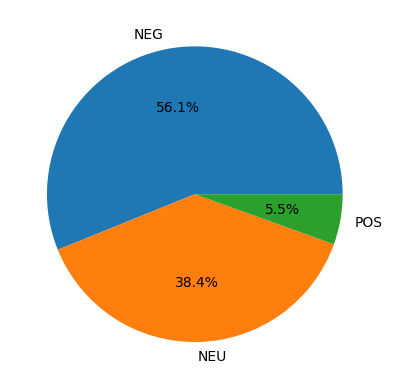

In [37]:
labels = 'NEG', 'NEU', 'POS'
sizes = [1245, 851, 122]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

## Analizando resultados

Se puede observar que el utilizar la funcion de procesamiento de texto de pysentimiento no hace ninguna diferencia en los resultados, por lo menos respecto a la cuenta de los labels colocados.

A continuación se exploran los resultados y se proponen algunas ideas para combatir la falta de labels.

En adelante se trabajara con el dataset de resultados obtenidos de la data procesada, ya que se supone que son lo mismo.


In [ ]:
df_resultados2.loc[(df_resultados2.POS > 0.9) | (df_resultados2.NEG > 0.9) | (df_resultados2.NEU > 0.9)]

,Sentimiento,POS,NEG,NEU,Texto
33,NEG,0.005731,0.913327,0.080942,Ojalá que la @usuario no me descuente cuota de...
35,NEG,0.004982,0.947579,0.047439,@usuario Al bajar mi cert de cotizaciones me d...
52,NEG,0.004510,0.938775,0.056716,@usuario Jamás se pudo bajar la gifcard con un...
57,POS,0.925919,0.006552,0.067529,@usuario @usuario Excelente y productiva jorna...
59,NEG,0.002863,0.939959,0.057177,@usuario @usuario @usuario @usuario Vine a bus...
...,...,...,...,...,...
2210,NEG,0.002382,0.950322,0.047296,Hoy fui a @usuario a ver qué pasaba con el pag...
2211,NEG,0.005764,0.946064,0.048172,@usuario estimados a un transcurrido 11 dias d...
2212,NEG,0.003895,0.949184,0.046920,@usuario cansa rogar que me devuelvan el dine...
2213,NEG,0.004068,0.943666,0.052267,@usuario Me quedé sin trabajo y debo solo 1 CU...


Podemos observar que al buscar aquellos tweet con una probabilidad mayor a 0.9 de que el sentimiento corresponda al asignado, la cantidad de de tweets que cumplen esta regla es considerable respecto a la totalidad del dataset.

In [ ]:
df_resultados2.shape

(2218, 5)

In [ ]:
wall = 0.9
print(
"% del dataset completo con una probabilidad del sentimiento mayor a", wall, " la proporcion es: ",
df_resultados2.loc[(df_resultados2.POS > wall) | (df_resultados2.NEG > wall) | (df_resultados2.NEU > wall)].shape[0] /
df_resultados2.shape[0]
)

wall = 0.8
print(
"% del dataset completo con una probabilidad del sentimiento mayor a", wall, " la proporcion es: ",
df_resultados2.loc[(df_resultados2.POS > wall) | (df_resultados2.NEG > wall) | (df_resultados2.NEU > wall)].shape[0] /
df_resultados2.shape[0]
)

wall = 0.7
print(
"% del dataset completo con una probabilidad del sentimiento mayor a", wall, " la proporcion es: ",
df_resultados2.loc[(df_resultados2.POS > wall) | (df_resultados2.NEG > wall) | (df_resultados2.NEU > wall)].shape[0] /
df_resultados2.shape[0]
)

% del dataset completo con una probabilidad del sentimiento mayor a 0.9  la proporcion es:  0.31424706943192066
% del dataset completo con una probabilidad del sentimiento mayor a 0.8  la proporcion es:  0.5775473399458972
% del dataset completo con una probabilidad del sentimiento mayor a 0.7  la proporcion es:  0.7434625788999099


Al obtener la proporción de datos que cumplen la condición dada de su probabilidad, podemos ver existe una cantidad no menor de datos "bien" clasificamos (si confiamos en el modelo).

De aqui se propone  utilizar estos datos que se tiene cierta seguridad de su clasificacion para poder "afinar" el modelo a las caracteristicas que se requieren.

Por otro lado podemos pasar a buscar aquellos tweet de los que se tenga menos certeza de su clasificacion.

In [ ]:
#definimos algunos dataset auxiliares

#Definimos dataset que contienen resultados con una probabilidad de "wall" para que cada oracion tenga el sentimiento asignado
wall = 0.9
dfp09 = df_resultados2.loc[(df_resultados2.POS > wall) | (df_resultados2.NEG > wall) | (df_resultados2.NEU > wall)]

wall = 0.8
dfp08 = df_resultados2.loc[(df_resultados2.POS > wall) | (df_resultados2.NEG > wall) | (df_resultados2.NEU > wall)]

wall = 0.7
dfp07 = df_resultados2.loc[(df_resultados2.POS > wall) | (df_resultados2.NEG > wall) | (df_resultados2.NEU > wall)]

In [ ]:


#Buscamos aquellos resultados mas ambiguos. Que es ambiguo? depende...
((df_resultados2.POS.between(0.0, 0.5)) & (df_resultados2.NEG.between(0.0, 0.5)) & (df_resultados2.NEU.between(0.0, 0.5))).value_counts()

,count
False,2171
True,47


In [ ]:
df_resultados2.loc[((df_resultados2.POS.between(0.0, 0.5)) & (df_resultados2.NEG.between(0.0, 0.5)) & (df_resultados2.NEU.between(0.0, 0.5)))]

,Sentimiento,POS,NEG,NEU,Texto
13,NEU,0.447834,0.066928,0.485238,Saludo protocolar entre prefecto inspector Jos...
16,NEU,0.437720,0.103959,0.458321,"RT @usuario: hashtag aymapu, emprendedor de la..."
48,POS,0.485178,0.060471,0.454351,De una idea de 2 estudiantes de doctorado de @...
150,POS,0.472521,0.071982,0.455496,RT @usuario: EN VIVO | Premio a la Trayectoria...
195,NEU,0.357648,0.177971,0.464381,@usuario Hecho
222,NEU,0.197042,0.320057,0.482901,RT @usuario: Saludo la iniciativa de @usuario ...
223,POS,0.489940,0.106198,0.403862,Los comerciales de @usuario son lo que siempre...
227,NEU,0.401206,0.101005,0.497789,"RT @usuario: Martín Andrade, Arquitecto y Dtor..."
371,NEU,0.253577,0.286101,0.460322,@usuario Quero ver me levar até o Chile para a...
404,NEU,0.031905,0.479379,0.488716,@usuario mandé un mensaje por interno para que...


# ***Conclusiones***


Podemos observar que la mayoria de los datos que son "ambiguos" dividen su clasificacion entre 2 clases mayormente ( hay una eleccion cercana al 0.5-0.5). Como son solo 50 tweets podriamos tratar de hacer labels a mano.


De esta manera se propone una estrategia que consiste en:



*   Utilizar el modelo para asignar label para aquellos tweet con probabilidad de clasificacion mayor a un threshold.
*   Utilizar los resultados del modelo para encontrar aquellos tweets que son mas dificiles de predecir y averiguar, ya sea leyendo los tweets o por otro metodo,
 porqué son tan dificiles de predecir.
*   Aquellos tweets dificiles de encontrar pueden ser un punto de partida para asignar labels a mano.


En adelante solo se realiza una breve exploracion de los datasets de resultados con un threshold.


In [ ]:
df_resultados2.loc[(df_resultados2.POS > 0.1)]

,Sentimiento,POS,NEG,NEU,Texto
0,POS,0.652899,0.067612,0.279488,¡Atención! @usuario y @usuario destacaron a ha...
5,POS,0.648634,0.052116,0.299249,RT @usuario: emoji medalla deportiva emoji Fu...
8,POS,0.845674,0.010896,0.143429,"Hola a todos!, espero que estén teniendo una b..."
10,NEU,0.420135,0.032574,0.547290,Vota por tu emprendimiento favorito en TECLA 6...
12,NEU,0.249872,0.190705,0.559423,"EN VIVO | Premio a la Trayectoria, presentado ..."
...,...,...,...,...,...
2181,POS,0.779266,0.013463,0.207271,Te-cito a disfrutar de una rica tacita de feli...
2196,NEU,0.420296,0.025034,0.554670,"Hola, me ayudarían?\n\nPorfa visiten url , cli..."
2201,NEU,0.420059,0.034965,0.544976,¡Hola! ¿Me ayudan?\n\nTaloo fue seleccionado p...
2208,POS,0.937261,0.009832,0.052906,@usuario y el programa hashtag grande entre gr...


In [ ]:
df_resultados2.loc[((df_resultados2.POS.between(0.0, 0.5)) & (df_resultados2.NEG.between(0.0, 0.5)) & (df_resultados2.NEU.between(0.0, 0.5)))]

,Sentimiento,POS,NEG,NEU,Texto
13,NEU,0.447834,0.066928,0.485238,Saludo protocolar entre prefecto inspector Jos...
16,NEU,0.437720,0.103959,0.458321,"RT @usuario: hashtag aymapu, emprendedor de la..."
48,POS,0.485178,0.060471,0.454351,De una idea de 2 estudiantes de doctorado de @...
150,POS,0.472521,0.071982,0.455496,RT @usuario: EN VIVO | Premio a la Trayectoria...
195,NEU,0.357648,0.177971,0.464381,@usuario Hecho
222,NEU,0.197042,0.320057,0.482901,RT @usuario: Saludo la iniciativa de @usuario ...
223,POS,0.489940,0.106198,0.403862,Los comerciales de @usuario son lo que siempre...
227,NEU,0.401206,0.101005,0.497789,"RT @usuario: Martín Andrade, Arquitecto y Dtor..."
371,NEU,0.253577,0.286101,0.460322,@usuario Quero ver me levar até o Chile para a...
404,NEU,0.031905,0.479379,0.488716,@usuario mandé un mensaje por interno para que...


In [ ]:
wall = 0.9
df_resultados2.loc[(df_resultados2.POS > wall) | (df_resultados2.NEG > wall) | (df_resultados2.NEU > wall)]

,Sentimiento,POS,NEG,NEU,Texto
33,NEG,0.005731,0.913327,0.080942,Ojalá que la @usuario no me descuente cuota de...
35,NEG,0.004982,0.947579,0.047439,@usuario Al bajar mi cert de cotizaciones me d...
52,NEG,0.004510,0.938775,0.056716,@usuario Jamás se pudo bajar la gifcard con un...
57,POS,0.925919,0.006552,0.067529,@usuario @usuario Excelente y productiva jorna...
59,NEG,0.002863,0.939959,0.057177,@usuario @usuario @usuario @usuario Vine a bus...
...,...,...,...,...,...
2210,NEG,0.002382,0.950322,0.047296,Hoy fui a @usuario a ver qué pasaba con el pag...
2211,NEG,0.005764,0.946064,0.048172,@usuario estimados a un transcurrido 11 dias d...
2212,NEG,0.003895,0.949184,0.046920,@usuario cansa rogar que me devuelvan el dine...
2213,NEG,0.004068,0.943666,0.052267,@usuario Me quedé sin trabajo y debo solo 1 CU...


In [ ]:
print("p = 0.9", dfp09.Sentimiento.value_counts())
print("p = 0.8", dfp08.Sentimiento.value_counts())
print("p = 0.7", dfp07.Sentimiento.value_counts())

p = 0.9 Sentimiento
NEG    644
NEU     32
POS     21
Name: count, dtype: int64
p = 0.8 Sentimiento
NEG    888
NEU    350
POS     43
Name: count, dtype: int64
p = 0.7 Sentimiento
NEG    1046
NEU     540
POS      63
Name: count, dtype: int64


In [ ]:
wall = 0.2
df_resultados2.loc[(df_resultados2.POS > wall) & (df_resultados2.NEG > wall)]

,Sentimiento,POS,NEG,NEU,Texto
371,NEU,0.253577,0.286101,0.460322,@usuario Quero ver me levar até o Chile para a...
518,NEU,0.219580,0.231291,0.549128,@usuario @usuario @usuario @usuario @usuario @...
550,NEU,0.218831,0.244805,0.536364,@usuario @usuario @usuario @usuario @usuario @...
680,POS,0.421294,0.323313,0.255393,"@usuario @usuario lo siento mucho, estimado.ma..."
1662,NEU,0.235763,0.204647,0.559591,@usuario @usuario @usuario Es mejor el sistema...


In [ ]:
wall=0.9
df_resultados2.loc[(df_resultados2.POS < wall) & (df_resultados2.NEG < wall) & (df_resultados2.NEU < wall)].shape

(1521, 5)